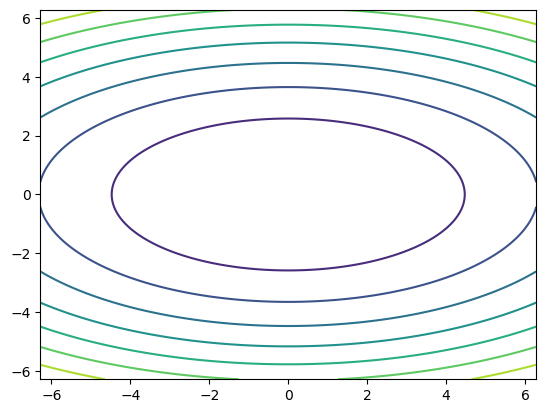

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.linspace(-2*np.pi,2*np.pi,1000),
                   np.linspace(-2*np.pi,2*np.pi,1000))
def func(x,y):
  return x**2 + 3*y**2

plt.contour(X,Y, func(X,Y))

#### Algorithm 
$\nabla f(\textbf{x})=0$

$f(x,y) = x^2+3y^2$

$\nabla f(\textbf{x})=\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y} = 2x\hat{\textbf{x}}+6y\hat{\textbf{y}}$

$\textbf{x}_{k+1}(\delta) = \textbf{x}_k-\delta \nabla f (\textbf{x}_k)$

$F(\delta) = f(\textbf{x}_{k+1}(\delta))$

$\frac{\partial F}{\partial \delta}=-\nabla f (\textbf{x}_{k+1})\nabla f (\textbf{x}_k)=0$

In [34]:
N = 10
x = np.empty(N)
y = np.empty(N)
f = np.empty(N)

x[0] = 6
y[0] = 5

f0 = func(x[0],y[0])  

for i in range(N-1):
  # alpha =(x[i]**2 + 9*y[i]**2)/(2*x[i]**2 + 54*y[i]**2)
  alpha = 0.1
  x[i+1] = (1 - 2*alpha)*x[i]
  y[i+1] = (1 - 6*alpha)*y[i]
  f[i+1] = x[i+1]**2 + 3*y[i+1]**2
  if np.abs(f[i+1]-f[i]) < 10**(-6):
        x = x[:i+2]
        y = y[:i+2]
        f = f[:i+2]
        break
  

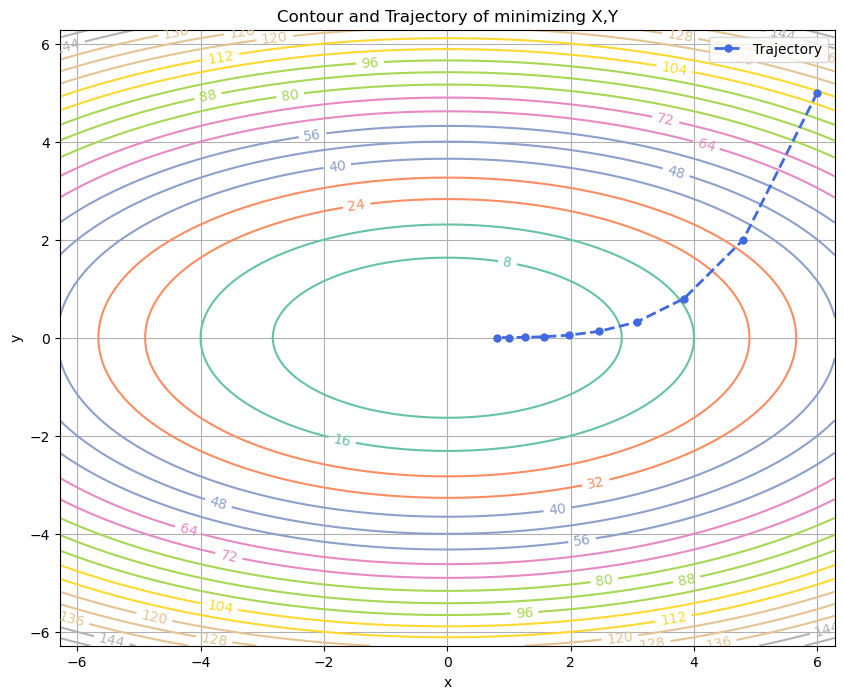

In [35]:
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, func(X,Y), levels=20, cmap="Set2")
plt.clabel(contour, inline=1, fontsize=10)

plt.plot(x, y, color='royalblue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour and Trajectory of minimizing X,Y')
plt.legend(['Trajectory', 'Contour'])
plt.grid(True)
plt.show()


In [41]:
def numerical_gradient(f, x, y, h=1e-6):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return df_dx, df_dy

N = 10
x = np.empty(N)
y = np.empty(N)
f_vals = np.empty(N)

x[0] = 6
y[0] = 5

f_vals[0] = func(x[0], y[0])  
alpha = 0.1

for i in range(N - 1):
    df_dx, df_dy = numerical_gradient(func, x[i], y[i])
    
    x[i + 1] = x[i] - alpha * df_dx
    y[i + 1] = y[i] - alpha * df_dy
    f_vals[i + 1] = func(x[i + 1], y[i + 1])
    
    if np.abs(f_vals[i + 1] - f_vals[i]) < 1e-6:
        x = x[:i + 2]
        y = y[:i + 2]
        f_vals = f_vals[:i + 2]
        break

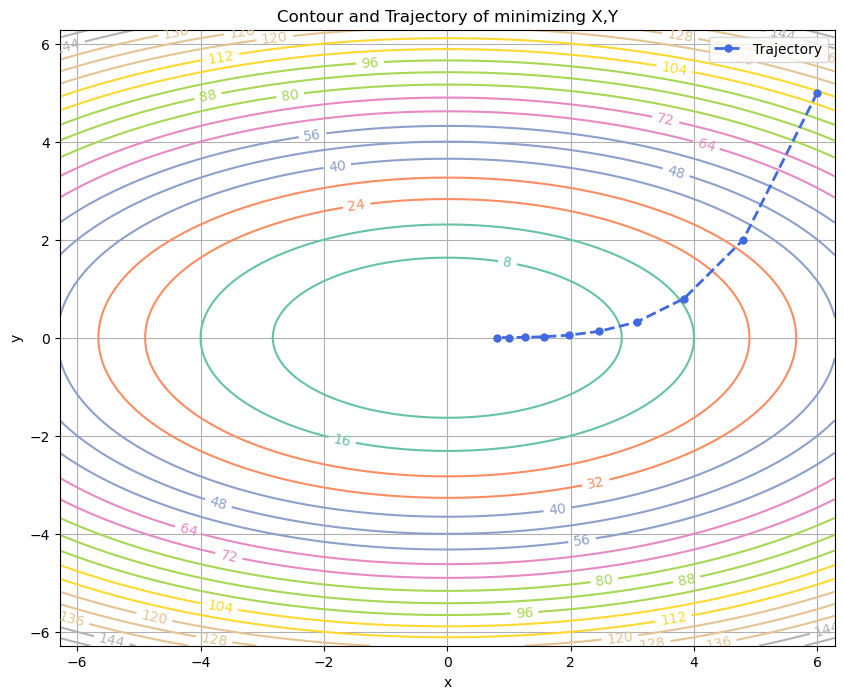

In [42]:
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, func(X,Y), levels=20, cmap="Set2")
plt.clabel(contour, inline=1, fontsize=10)

plt.plot(x, y, color='royalblue', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour and Trajectory of minimizing X,Y')
plt.legend(['Trajectory', 'Contour'])
plt.grid(True)
plt.show()


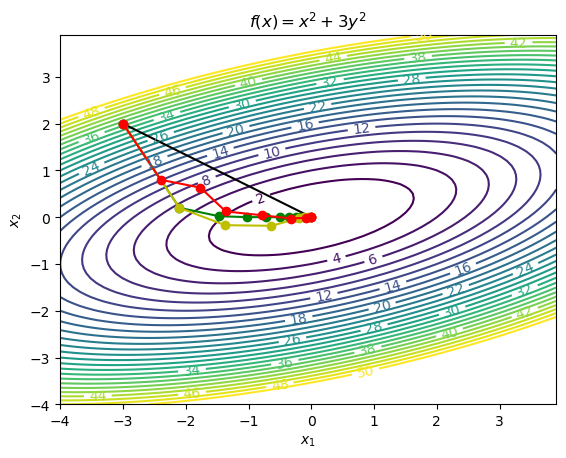

In [39]:
# https://apmonitor.com/me575/index.php/Main/QuasiNewton
# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = x1**2 + 3*x2**2
    return obj

# define objective gradient
def dfdx(x):
    x1 = x[0]
    x2 = x[1]
    grad = []
    grad.append(2.0 * x1)
    grad.append(6.0 * x2)
    return grad

# Exact 2nd derivatives (hessian)
H = [[2.0, 0],[0, 6.0]]

# Start location
x_start = [-3.0, 2.0]

# Design variables at mesh points
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = x1_mesh**2 - 2.0 * x1_mesh * x2_mesh + 4 * x2_mesh**2

# Create a contour plot
plt.figure()
# Specify contour lines
lines = range(2,52,2)
# Plot contours
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title(r'$f(x)=x^2 + 3y^2$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

##################################################
# Newton's method
##################################################
xn = np.zeros((2,2))
xn[0] = x_start
# Get gradient at start location (df/dx or grad(f))
gn = dfdx(xn[0])
# Compute search direction and magnitude (dx)
#  with dx = -inv(H) * grad
delta_xn = np.empty((1,2))
delta_xn = -np.linalg.solve(H,gn)
xn[1] = xn[0]+delta_xn
plt.plot(xn[:,0],xn[:,1],'k-o')

##################################################
# Steepest descent method
##################################################
# Number of iterations
n = 8
# Use this alpha for every line search
alpha = 0.15
# Initialize xs
xs = np.zeros((n+1,2))
xs[0] = x_start
# Get gradient at start location (df/dx or grad(f))
for i in range(n):
    gs = dfdx(xs[i])
    # Compute search direction and magnitude (dx)
    #  with dx = - grad but no line searching
    xs[i+1] = xs[i] - np.dot(alpha,dfdx(xs[i]))
plt.plot(xs[:,0],xs[:,1],'g-o')

##################################################
# Conjugate gradient method
##################################################
# Number of iterations
n = 8
# Use this alpha for the first line search
alpha = 0.15
neg = [[-1.0,0.0],[0.0,-1.0]]
# Initialize xc
xc = np.zeros((n+1,2))
xc[0] = x_start
# Initialize delta_gc
delta_cg = np.zeros((n+1,2))
# Initialize gc
gc = np.zeros((n+1,2))
# Get gradient at start location (df/dx or grad(f))
for i in range(n):
    gc[i] = dfdx(xc[i])
    # Compute search direction and magnitude (dx)
    #  with dx = - grad but no line searching
    if i==0:
        beta = 0
        delta_cg[i] = - np.dot(alpha,dfdx(xc[i]))
    else:
        beta = np.dot(gc[i],gc[i]) / np.dot(gc[i-1],gc[i-1])
        delta_cg[i] = alpha * np.dot(neg,dfdx(xc[i])) + beta * delta_cg[i-1]
    xc[i+1] = xc[i] + delta_cg[i]
plt.plot(xc[:,0],xc[:,1],'y-o')

##################################################
# Quasi-Newton method
##################################################
# Number of iterations
n = 8
# Use this alpha for every line search
alpha = np.linspace(0.1,1.0,n)
# Initialize delta_xq and gamma
delta_xq = np.zeros((2,1))
gamma = np.zeros((2,1))
part1 = np.zeros((2,2))
part2 = np.zeros((2,2))
part3 = np.zeros((2,2))
part4 = np.zeros((2,2))
part5 = np.zeros((2,2))
part6 = np.zeros((2,1))
part7 = np.zeros((1,1))
part8 = np.zeros((2,2))
part9 = np.zeros((2,2))
# Initialize xq
xq = np.zeros((n+1,2))
xq[0] = x_start
# Initialize gradient storage
g = np.zeros((n+1,2))
g[0] = dfdx(xq[0])
# Initialize hessian storage
h = np.zeros((n+1,2,2))
h[0] = [[1, 0.0],[0.0, 1]]
for i in range(n):
    # Compute search direction and magnitude (dx)
    #  with dx = -alpha * inv(h) * grad
    delta_xq = -np.dot(alpha[i],np.linalg.solve(h[i],g[i]))
    xq[i+1] = xq[i] + delta_xq

    # Get gradient update for next step
    g[i+1] = dfdx(xq[i+1])

    # Get hessian update for next step
    gamma = g[i+1]-g[i]
    part1 = np.outer(gamma,gamma)
    part2 = np.outer(gamma,delta_xq)
    part3 = np.dot(np.linalg.pinv(part2),part1)

    part4 = np.outer(delta_xq,delta_xq)
    part5 = np.dot(h[i],part4)
    part6 = np.dot(part5,h[i])
    part7 = np.dot(delta_xq,h[i])
    part8 = np.dot(part7,delta_xq)
    part9 = np.dot(part6,1/part8)

    h[i+1] = h[i] + part3 - part9

plt.plot(xq[:,0],xq[:,1],'r-o')
plt.savefig('contour.png')
plt.show()